In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
%matplotlib inline

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [3]:

#Load CSV into dataframe
filename = 'rowan_data_science_sale_data.csv'
df = pd.read_csv(filename)

headers = list(df)
colors = df['color'].unique()
shape = df.shape


print("Headers: ", headers)
print("Colors: ", colors)
print("Num Rows: "+ str(shape[0]), "Num Cols: " + str(shape[1]))

#print(df)

Headers:  ['color', 'sale_price']
Colors:  ['BLACK' 'BLUE' 'RED']
Num Rows: 236 Num Cols: 2


In [29]:
conn_string = "host='localhost' port ='5433' dbname='saledata' user='python' password='python'"
conn = psycopg2.connect(conn_string)
cursor = conn.cursor()

In [30]:
sql = "INSERT INTO sales VALUES"

for index, row in df.iterrows():
    sql += "('"+row[0]+"',"+str(row[1])+"),"
   #cursor.execute("INSERT INTO  * FROM my_table")
    
sql = sql[:-1] + ";"
print(sql)
print(cursor.execute(sql))


INSERT INTO sales VALUES('BLACK',95000),('BLUE',260000),('RED',140000),('BLUE',75000),('BLUE',50000),('RED',130000),('BLUE',175000),('RED',195000),('RED',130000),('BLACK',42000),('BLUE',70000),('RED',120000),('BLUE',60000),('BLUE',23000),('BLACK',100000),('RED',200000),('BLACK',300000),('BLUE',190000),('RED',145000),('BLUE',200000),('BLACK',150000),('BLUE',120000),('RED',50000),('BLUE',300000),('BLUE',300000),('RED',110000),('RED',130000),('RED',220000),('BLUE',110000),('BLUE',165000),('BLACK',140000),('RED',185000),('BLACK',50000),('BLUE',230000),('RED',80000),('BLUE',50000),('BLACK',130000),('BLACK',145000),('BLACK',130000),('RED',300000),('BLACK',60000),('RED',125000),('BLUE',55000),('BLUE',50000),('BLUE',90000),('RED',210000),('RED',160000),('BLUE',57000),('BLUE',80000),('BLACK',49000),('BLACK',70000),('BLACK',65000),('BLUE',70000),('RED',210000),('BLUE',70000),('BLACK',65000),('BLUE',75000),('RED',100000),('RED',210000),('BLUE',90000),('BLUE',95000),('BLACK',45000),('BLACK',150000

In [34]:
sql = "SELECT * FROM sales;"
cursor.execute(sql)
records = cursor.fetchall()
print(records)

[('BLACK', 95000), ('BLUE', 260000), ('RED', 140000), ('BLUE', 75000), ('BLUE', 50000), ('RED', 130000), ('BLUE', 175000), ('RED', 195000), ('RED', 130000), ('BLACK', 42000), ('BLUE', 70000), ('RED', 120000), ('BLUE', 60000), ('BLUE', 23000), ('BLACK', 100000), ('RED', 200000), ('BLACK', 300000), ('BLUE', 190000), ('RED', 145000), ('BLUE', 200000), ('BLACK', 150000), ('BLUE', 120000), ('RED', 50000), ('BLUE', 300000), ('BLUE', 300000), ('RED', 110000), ('RED', 130000), ('RED', 220000), ('BLUE', 110000), ('BLUE', 165000), ('BLACK', 140000), ('RED', 185000), ('BLACK', 50000), ('BLUE', 230000), ('RED', 80000), ('BLUE', 50000), ('BLACK', 130000), ('BLACK', 145000), ('BLACK', 130000), ('RED', 300000), ('BLACK', 60000), ('RED', 125000), ('BLUE', 55000), ('BLUE', 50000), ('BLUE', 90000), ('RED', 210000), ('RED', 160000), ('BLUE', 57000), ('BLUE', 80000), ('BLACK', 49000), ('BLACK', 70000), ('BLACK', 65000), ('BLUE', 70000), ('RED', 210000), ('BLUE', 70000), ('BLACK', 65000), ('BLUE', 75000), 

In [40]:
df = pd.DataFrame(records)
df.columns = ['color','sale_price']
headers = list(df)
#colors = df['color'].unique()
shape = df.shape


print("Headers: ", headers)
print("Colors: ", colors)
print("Num Rows: "+ str(shape[0]), "Num Cols: " + str(shape[1]))

Headers:  ['color', 'sale_price']
Colors:  ['RED', 'BLACK', 'BLUE']
Num Rows: 236 Num Cols: 2


In [41]:
widget_cost = 100000
cost_adj = df.copy()
cost_adj['sale_price'] = cost_adj['sale_price']-widget_cost


#Reoredered colors for print order
colors = ['RED','BLACK','BLUE']
sizes = [215, 130, 245, 210]
chart_colors = ['lightcoral','gray','lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(pct*total/100)
        return '${v:,}  ({p:.2f}%)'.format(v=val,p=pct)
    return my_autopct

### Class Histograms

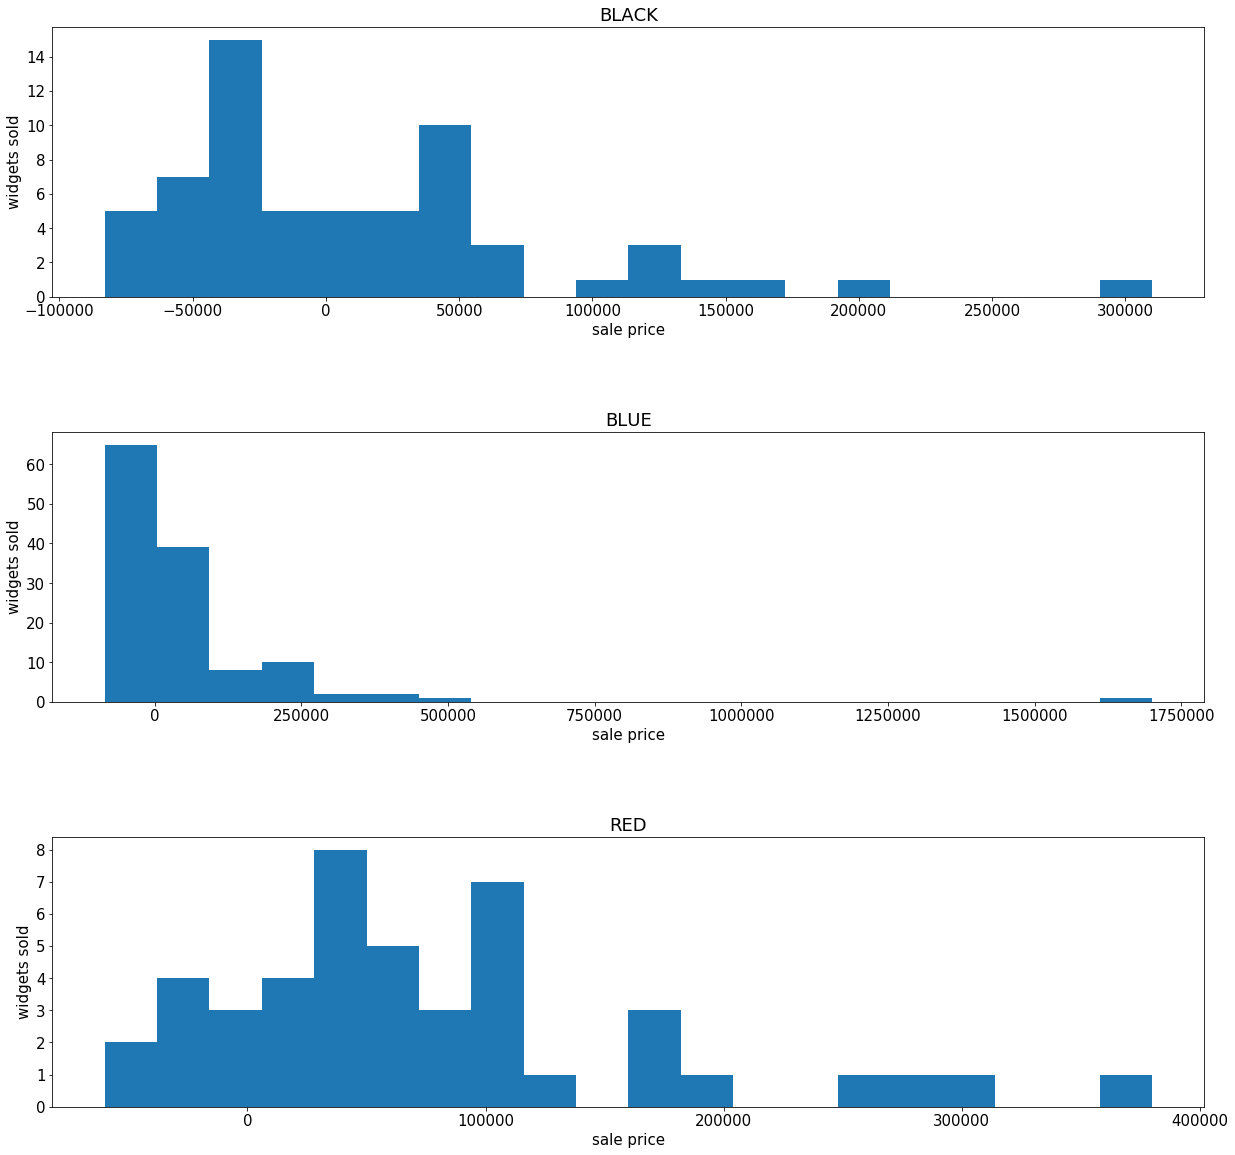

In [42]:
hist = cost_adj.hist(by=cost_adj['color'],layout = (3,1),figsize = (20,20),xrot = 0.1,bins = 20);

for i in range(len(hist)):
    hist[i].set_xlabel("sale price")
    hist[i].set_ylabel("widgets sold")

### Case 0:
Reults of sale with sub optimal selling strategy

RED	 Total Profits: 3435000 (33.75%)  	 Total Sales: 45 (19.07%)
BLACK	 Total Profits: 837000 (8.22%)  	 Total Sales: 63 (26.69%)
BLUE	 Total Profits: 5907000 (58.03%)  	 Total Sales: 128 (54.24%)


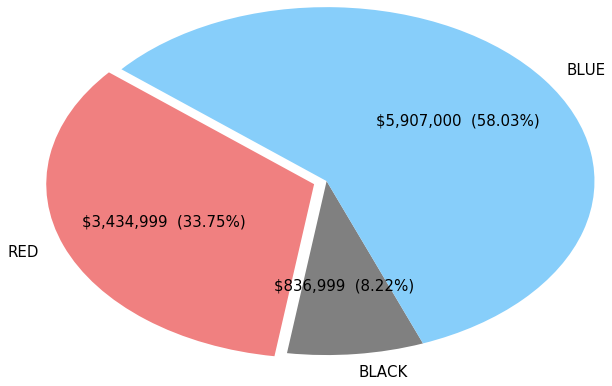

In [43]:
total_profits = sum(cost_adj['sale_price'])
total_sales_count = len(cost_adj)

profit_chart = []
for color in colors:
    
    profits_share = sum(cost_adj[cost_adj['color'] == color]['sale_price'])/total_profits*100
    sales_share =   len(cost_adj[cost_adj['color'] == color]['sale_price'])/total_sales_count*100
    
    profit_chart.append(sum(cost_adj[cost_adj['color'] == color]['sale_price']))
    
    
    color_data = cost_adj[cost_adj['color'] == color]['sale_price']
    print(color + "\t Total Profits:", sum(cost_adj[cost_adj['color'] == color]['sale_price']), "(%.2f%%)" %(profits_share),
          " \t Total Sales:", len(cost_adj[cost_adj['color'] == color]['sale_price']),"(%.2f%%)"% (sales_share))


plt.pie(profit_chart, explode=explode,
        autopct=make_autopct(profit_chart), 
        labels=colors, colors=chart_colors, startangle=140, radius = 2);

### Case 0.5:

Results of sale with sub optimal selling strategy, and ignoring 1.7m blue outlier

RED	 Total Profits: 3435000 (40.51%)  	 Total Sales: 45 (19.15%)
BLACK	 Total Profits: 837000 (9.87%)  	 Total Sales: 63 (26.81%)
BLUE	 Total Profits: 4207000 (49.62%)  	 Total Sales: 127 (54.04%)


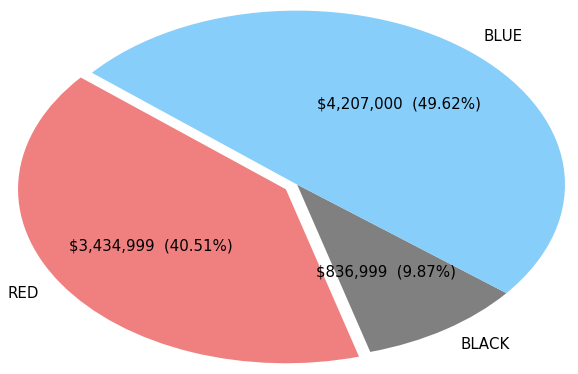

In [44]:
total_profits = sum(cost_adj[(cost_adj['sale_price'] < 1000000)]['sale_price'])
total_sales_count = len(cost_adj[(cost_adj['sale_price'] < 1000000)]['sale_price'])

profit_chart = []
for color in colors:
    
    color_data = cost_adj[(cost_adj['color'] == color)&(cost_adj['sale_price'] < 1000000)]['sale_price']
    color_sum = sum(color_data)
    color_len = len(color_data)
    profits_share = color_sum/total_profits*100
    sales_share =   color_len/total_sales_count*100
    
    profit_chart.append(color_sum)
    
    
    print(color + "\t Total Profits:", color_sum, "(%.2f%%)" %(profits_share),
          " \t Total Sales:", color_len,"(%.2f%%)"% (sales_share))
    
    
plt.pie(profit_chart, explode=explode,
        autopct=make_autopct(profit_chart), 
        labels=colors, colors=chart_colors, startangle=140, radius = 2);

### Case 1:
Projected results of sale if no widget is sold for less than $100000

RED	 Total Profits: 3640000 (26.00%)  	 Total Sales: 37 (28.91%)
BLACK	 Total Profits: 2095000 (14.96%)  	 Total Sales: 28 (21.88%)
BLUE	 Total Profits: 8265000 (59.04%)  	 Total Sales: 63 (49.22%)


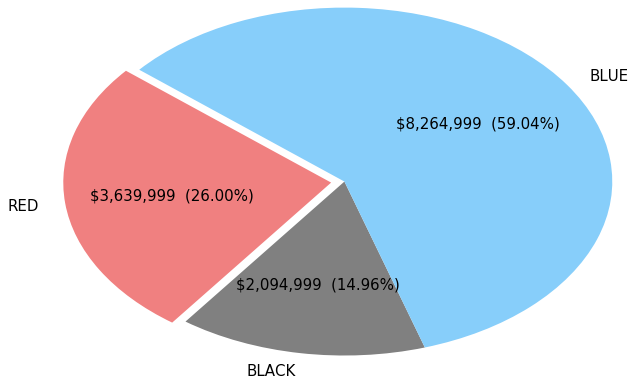

In [45]:
positive_data = cost_adj[(cost_adj['sale_price'] > 0)]['sale_price']
total_profits_no_loss = sum(positive_data)
total_sale_count_no_loss = len(positive_data)

profit_chart = []
for color in colors:    
    color_data = cost_adj[(cost_adj['color'] == color) & (cost_adj['sale_price'] > 0)]['sale_price']
    color_sum = sum(color_data)
    color_len = len(color_data)
    profits_share = color_sum/total_profits_no_loss*100
    sales_share =   color_len/total_sale_count_no_loss*100
    
    profit_chart.append(color_sum)
    print(color + "\t Total Profits:", color_sum, "(%.2f%%)" %(profits_share),
          " \t Total Sales:", color_len,"(%.2f%%)"% (sales_share))
    
plt.pie(profit_chart, explode=explode,
        autopct=make_autopct(profit_chart), 
        labels=colors, colors=chart_colors, startangle=140, radius = 2);

### Case 1.5:
Projected results of sale if no widget is sold for less than $100000, and ignoring 1.7m blue outlier

RED	 Total Profits: 3640000 (29.59%)  	 Total Sales: 37 (29.13%)
BLACK	 Total Profits: 2095000 (17.03%)  	 Total Sales: 28 (22.05%)
BLUE	 Total Profits: 6565000 (53.37%)  	 Total Sales: 62 (48.82%)


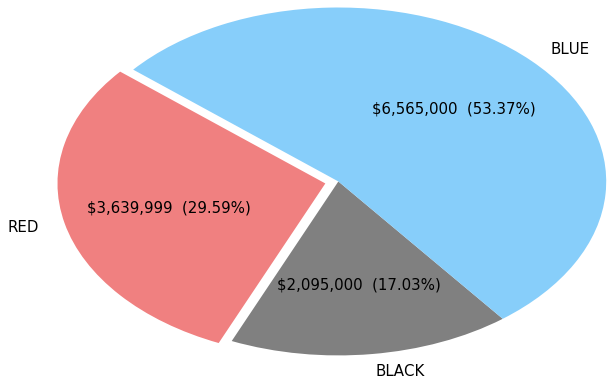

In [46]:
positive_data = cost_adj[(cost_adj['sale_price'] > 0)&(cost_adj['sale_price'] < 1000000)]['sale_price']
total_profits_no_loss = sum(positive_data)
total_sale_count_no_loss = len(positive_data)

profit_chart = []
for color in colors:    
    color_data = cost_adj[(cost_adj['color'] == color) & (cost_adj['sale_price'] > 0)&(cost_adj['sale_price'] < 1000000)]['sale_price']
    color_sum = sum(color_data)
    color_len = len(color_data)
    profits_share = color_sum/total_profits_no_loss*100
    sales_share =   color_len/total_sale_count_no_loss*100
    
    profit_chart.append(color_sum)
    print(color + "\t Total Profits:", color_sum, "(%.2f%%)" %(profits_share),
          " \t Total Sales:", color_len,"(%.2f%%)"% (sales_share))
    
    
plt.pie(profit_chart, explode=explode,
        autopct=make_autopct(profit_chart), 
        labels=colors, colors=chart_colors, startangle=140, radius = 2);

### Preparing Data for Case 2

In [47]:
projected_profits = {}
projected_sale_count = {}
for color in colors:
    projected_profits[color] = 0
    projected_sale_count[color] = 0


for color in colors:
    
    color_data = cost_adj[(cost_adj['color'] == color) & (cost_adj['sale_price'] > 0)]['sale_price']
    split_profit = sum(color_data)/2
    split_sales = len(color_data)/2
    
    #Double counts the split_x on red so red takes all
    projected_profits[color] = split_profit
    projected_profits['RED'] += split_profit
    
    projected_sale_count[color] += split_sales
    projected_sale_count['RED'] += split_sales

### Case 2:
Projected Results of sale if 'RED' company also produced and sold half of all non red colors, and all widgets are sold for more than $100000

RED	 Projected No Loss Total Profits: 8820000.0 (63.00%) 	 Projected No Loss Total Sales: 82.5 (64.45%)
BLACK	 Projected No Loss Total Profits: 1047500.0 (7.48%) 	 Projected No Loss Total Sales: 14.0 (10.94%)
BLUE	 Projected No Loss Total Profits: 4132500.0 (29.52%) 	 Projected No Loss Total Sales: 31.5 (24.61%)


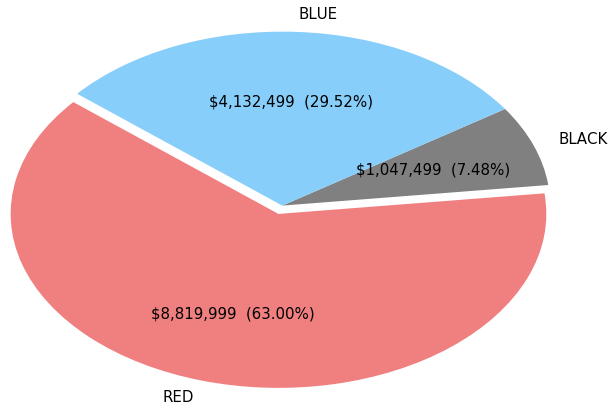

In [48]:
total_profits = 0
total_sales = 0 
for color in colors:
    total_profits += projected_profits[color]
    total_sales += projected_sale_count[color]

profit_chart = []
for color in colors:
    profits_share =  projected_profits[color]/total_profits*100
    sales_share =  projected_sale_count[color]/total_sales*100
    profit_chart.append(projected_profits[color])
    
    print(color + "\t Projected No Loss Total Profits:", projected_profits[color], "(%.2f%%)" %(profits_share),
          "\t Projected No Loss Total Sales:", projected_sale_count[color],"(%.2f%%)"% (sales_share))

plt.pie(profit_chart, explode=explode,
        autopct=make_autopct(profit_chart), 
        labels=colors, colors=chart_colors, startangle=140, radius = 2);

### Preparing Data for Case 3

In [49]:
projected_profits_with_loss = {}
projected_sale_count_with_loss = {}

for color in colors:
    projected_profits_with_loss[color] = 0
    projected_sale_count_with_loss[color] = 0

for color in colors:
    
    color_data = cost_adj[(cost_adj['color'] == color)]['sale_price']
    split_profit = sum(color_data)/2
    split_sales = len(color_data)/2
    
    #Double counts the split_x on red so red takes all
    #Calculation for RED's with sales is here for completeness sake but is not used in Case 3
    projected_profits_with_loss[color] = split_profit
    projected_profits_with_loss['RED'] += split_profit
    
    projected_sale_count_with_loss[color] += split_sales
    projected_sale_count_with_loss['RED'] += split_sales

### Case 3:
Projected results of sale if 'RED' company also produced and sold half of all non red for more than \$100000, and all other companies continued to sell widgets for less than or equal to $100000

RED	 Projected No Loss Total Profits: 8820000.0 (72.34%) 	 Projected No Loss Total Sales: 82.5 (46.35%)
BLACK	 Projected No Loss Total Profits: 418500.0 (3.43%) 	 Projected No Loss Total Sales: 31.5 (17.70%)
BLUE	 Projected No Loss Total Profits: 2953500.0 (24.22%) 	 Projected No Loss Total Sales: 64.0 (35.96%)


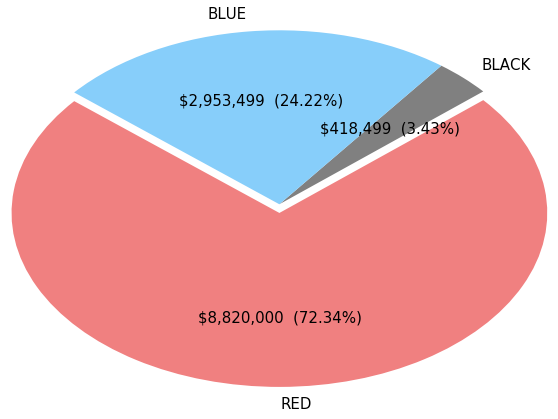

In [50]:
total_profits_with_loss = 0
total_sales_with_loss = 0
for color in colors:
    if color == 'RED':
        #Use non loss profit since 'RED' doesn't sell for a loss
        total_profits_with_loss += projected_profits[color]
        total_sales_with_loss += projected_sale_count[color]
    else:
        total_profits_with_loss += projected_profits_with_loss[color]
        total_sales_with_loss += projected_sale_count_with_loss[color]
        
profit_chart = []
for color in colors:
    
    if color == 'RED':
        cur_profits = projected_profits[color]
        cur_sale_count = projected_sale_count[color]
        
    else:
        cur_profits = projected_profits_with_loss[color]
        cur_sale_count = projected_sale_count_with_loss[color]
        

    profit_chart.append(cur_profits)
    profits_share =  cur_profits/total_profits_with_loss*100
    sales_share =  cur_sale_count/total_sales_with_loss*100
    
    print(color + "\t Projected No Loss Total Profits:", cur_profits, "(%.2f%%)" %(profits_share),
          "\t Projected No Loss Total Sales:", cur_sale_count,"(%.2f%%)"% (sales_share))
    
plt.pie(profit_chart, explode=explode,
        autopct=make_autopct(profit_chart), 
        labels=colors, colors=chart_colors, startangle=140, radius = 2);